In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Exercise 1:

**a) Read the breast-cancer-wisconsin.xlsx file. Note that there are some instances with missing
data, which have to be imputed before we can run PCA. Pandas offers convenient functions for
this. Apply an imputation method that makes sense for this dataset, and briefly explain your
decision.**

In [0]:
cancer_data = pd.read_excel("/content/breast-cancer-wisconsin.xlsx")
cancer_data.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [0]:
cancer_data.isnull().sum()

code            0
thickness       0
uniCelS         0
uniCelShape     0
marAdh          0
epiCelSize      0
bareNuc        16
blaChroma       0
normNuc         0
mitoses         0
class           0
dtype: int64

We can see from above inspection that only bareNuc has 16 missing values. Rest every column has no missing value

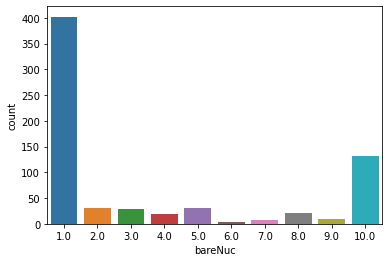

In [0]:
sns.countplot(cancer_data['bareNuc'])

We can see from above the data distribution of each number (0-10) in the plotted graph. The frequency of 1 is more than 400 times as compared to 10 i.e. occurring only around 150 times as compared to others. So we will impute the missing 16 values with the values "1.0" as it is the most occuring value in data. 

In [0]:
cancer_data['bareNuc'].isnull().sum()

16

In [0]:
impute = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data_complete = pd.DataFrame(impute.fit_transform(cancer_data))
data_complete.columns = cancer_data.columns
data_complete.index = cancer_data.index
data_complete.isnull().sum()

code           0
thickness      0
uniCelS        0
uniCelShape    0
marAdh         0
epiCelSize     0
bareNuc        0
blaChroma      0
normNuc        0
mitoses        0
class          0
dtype: int64

**Ans :** We used Simple Imputer function to impute the missing data and strategy used is "most frequently" that also corresponds to "mode" in statistics because of the distribution of the data in such a manner.

**b) Create a plot that, for any number n, shows what fraction of the overall variance in the data is
contained in the first n principal components. Make sure that you only include the nine relevant
numerical attributes in the PCA, not the sample codes or class IDs. How many components do
we need to cover ≥ 90% of the variance?**

In [55]:
pca_data = data_complete.drop(columns=["class","code"])
pca_data.shape

(699, 9)

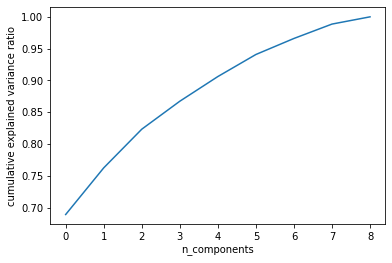

In [56]:
#data_complete.shape
pca = PCA(n_components=9)
pca.fit(pca_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance ratio');

We can conclude from the above graph that for n = 5, the cumulative variance goes beyond 90% so we will choose the n_components = 5.

In [57]:
pca2 = PCA(n_components=5)
pca2.fit(pca_data)

pca_five = pca2.transform(pca_data)
pca_five.shape

(699, 5)

**c) Each sample is now characterized by a point in PCA space. Create a scatter plot matrix that
shows the first five principal components. Each diagonal cell should contain two overlaid density
plots, one for the benign and one for the malignant class. Use different colors to distinguish
between the classes, and add a legend that clearly states which samples are benign or malignant.**

In [0]:
fivecomponents = pd.DataFrame(data = pca_five, columns = ['P.Component 1', 'P.Component 2', 'P.Component 3', 'P.Component 4', 'P.Component 5'])
fivecomponents['class'] = data_complete['class']
fivecomponents['class'].replace(2,"Benign",inplace=True)
fivecomponents['class'].replace(4,"Malignant",inplace=True)
fivecomponents.head()

,P.Component 1,P.Component 2,P.Component 3,P.Component 4,P.Component 5,class
0,-4.418342,0.032549,-1.732736,0.109784,-0.834715,Benign
1,4.861916,-4.869842,1.035612,0.642934,1.061164,Benign
2,-4.575277,-0.629610,0.049151,-0.328038,0.149807,Benign
3,5.165415,3.406013,-2.184542,-1.631945,3.283522,Benign
4,-4.053561,-0.105016,0.081709,0.841327,-1.694524,Benign


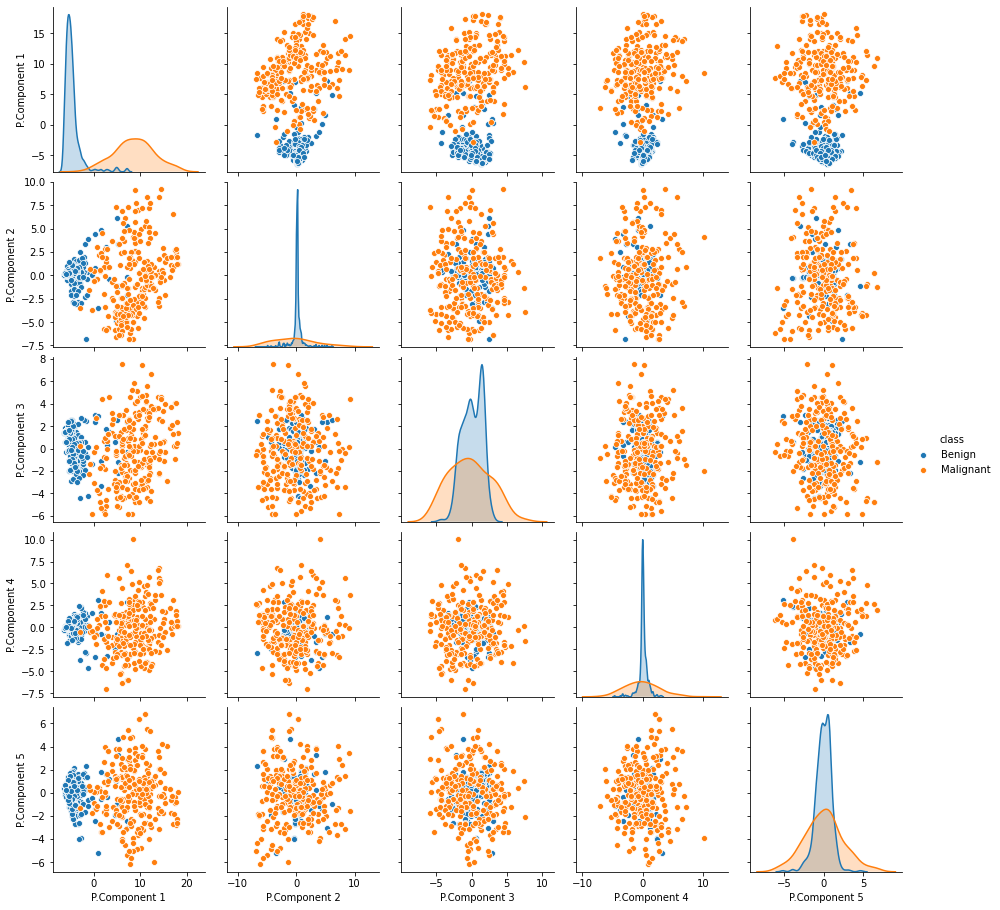

In [0]:
sns.pairplot(fivecomponents,hue="class",vars=fivecomponents.columns.drop("class"))

**d) Which PCA mode shows the strongest difference between the benign and the malignant samples?
Name the original variables that have the highest and lowest weights in its definition, respectively.**

**Ans** : The PCA mode that shows strongest difference is - Principal component axis 1 vs all the other principal component axis, illustrated below. 

**Highest weighted variable** - normNuc 

**Lowest weighted variable** - Thickness

In [0]:
pca2.components_.transpose()

array([[ 0.2983261 , -0.06201421, -0.84870565,  0.06534325, -0.40932322],
       [ 0.40439054,  0.2264635 , -0.02546854,  0.28496176,  0.34595861],
       [ 0.39224516,  0.16441813, -0.07517707,  0.19835691,  0.38210846],
       [ 0.33155363, -0.09978919,  0.48286957,  0.39844272, -0.63456569],
       [ 0.25000985,  0.18417043,  0.04907438,  0.19968275,  0.19340991],
       [ 0.43971674, -0.78618671,  0.08447575, -0.30713642,  0.16587589],
       [ 0.29212756,  0.01476453,  0.10830834, -0.04657243,  0.08070772],
       [ 0.35663675,  0.4789494 ,  0.13315283, -0.74476283, -0.2099911 ],
       [ 0.12370014,  0.16204477,  0.03508036,  0.15930581, -0.22035073]])

In [44]:
max(pca2.components_.transpose().argmax(axis=0))

7

In [48]:
min(pca2.components_.transpose().argmin(axis = 0))

0

In [49]:
pca_data.columns[max(pca2.components_.transpose().argmax(axis=0))]

'normNuc'

In [50]:
pca_data.columns[min(pca2.components_.transpose().argmin(axis = 0))]

'thickness'

**e) Scatterplot matrices often reveal outliers in the data. Visually identify at least one sample that
is far away from the others, remove it from the dataset, and re-generate the scatterplot matrix
without it.**

**Ans** : For Component 2 and 4, we can see outlier near the value 10, so we will remove it.

In [53]:
fivecomponents[fivecomponents["P.Component 2"] > 9]

,P.Component 1,P.Component 2,P.Component 3,P.Component 4,P.Component 5,class
177,8.955932,9.120091,0.106792,-0.022764,3.44001,Malignant
648,14.543083,9.211857,4.456608,3.740842,-1.58817,Malignant


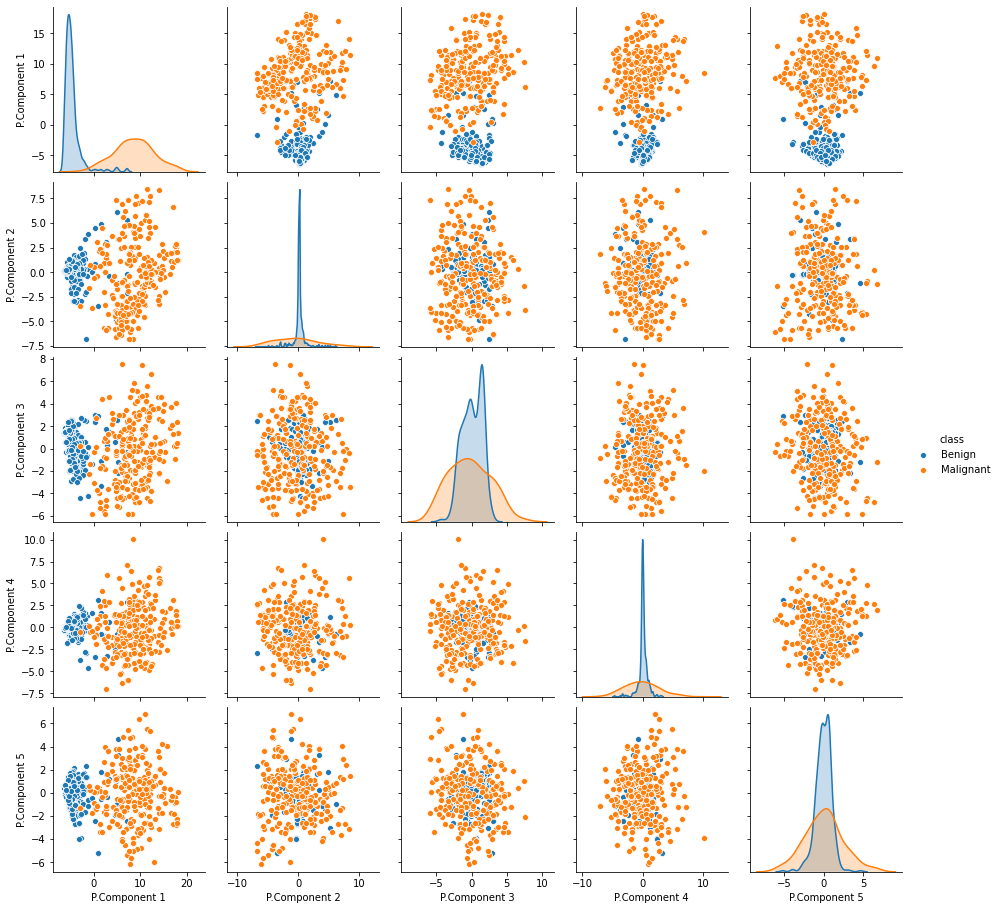

In [54]:
fivecomponents_updated = fivecomponents.loc[fivecomponents["P.Component 2"] <= 9]
sns.pairplot(fivecomponents_updated,hue="class",vars=fivecomponents_updated.columns.drop("class"))

**f) In the breast cancer dataset, all variables x i have a similar range, x i ∈ [1, 10]. If the variables of a dataset have very different ranges, for example one variable x 1 ∈ [1000, 2000] and another one
x 2 ∈ [1, 5], how would this affect the PCA? Could it make sense to pre-process the data in such
cases? Why and how?**

**Ans** : Sometimes one variable has a scale very different from the other. When we want to test the influence of these variables on a dataset, the variable with the highest numerical value will have more weight in the model simply because its numerical value is greater. 


One way to this problem could be that we rescale all the present variables to range between 0 and 1, changing the variable's values, but keeping the same proportion between each value. Now, all variables will have the same potential weight to PCA. Formally, this procedure is called "ranging" and to achieve it we divide each variable by the largest value that variable has in the dataset.


**g) Explain why, on this dataset, we cannot use Linear Discriminant Analysis (LDA) to create an
alternative 5D embedding in which the classes are more clearly separated. Use the LDA implementation in scikit-learn to perform a 1D LDA embedding and plot it (in a scatterplot) against the first principal component. Do they show a clear correlation? Is this true in general, or specific
to the dataset?**

**Ans :**  To create 5D embeddings, we need samples from at least 6 classes, however we only have 2 so we can create 1D embedding from it.

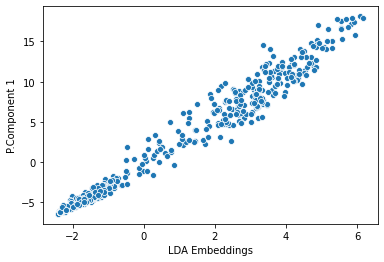

In [0]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(pca_data,cancer_data["class"])
lda_embedding = lda.transform(pca_data)
lda_embedding = np.reshape(lda_embedding,(lda_embedding.shape[0],))

ax = sns.scatterplot(x = lda_embedding, y = fivecomponents["P.Component 1"])
ax.set(xlabel="LDA Embeddings")
plt.show()

2. Yes, a clear positive correlation, as can be seen from the plot.
3. It is specific to the dataset, as the objective in LDA is to separate the classes, which may or may not be correlated with any component of PCA, where the preservation of the variance is targetted